# Importer les bibliotheques nécéssaires 


In [47]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
import folium.plugins as plugins
warnings.filterwarnings('ignore')


In [50]:
data=pd.read_csv("https://static.data.gouv.fr/resources/trajets-realises-en-covoiturage-registre-de-preuve-de-covoiturage/20230921-111347/2023-08.csv",sep=";")

In [52]:
data.head()

,journey_id,trip_id,journey_start_datetime,journey_start_date,journey_start_time,journey_start_lon,journey_start_lat,journey_start_insee,journey_start_department,journey_start_town,...,journey_end_insee,journey_end_department,journey_end_town,journey_end_towngroup,journey_end_country,passenger_seats,operator_class,journey_distance,journey_duration,has_incentive
0,17277353,68283544-8886-4fb7-ad84-4e0b8b665236,2023-08-01T00:00:00+02:00,2023-08-01,00:00:00,7.335,43.711,06011,06,Beaulieu-sur-Mer,...,99138,NaN,NaN,NaN,MONACO,1,C,9532,17,NON
1,17277360,405d6e84-0661-4d2f-9769-18d4d319b392,2023-08-01T00:00:00+02:00,2023-08-01,00:00:00,6.120,49.580,99137,NaN,NaN,...,57672,57,Thionville,CA Portes de France-Thionville,France,1,C,23479,23,NON
2,17298753,050a2d6d-f5fe-4f63-983d-91b3db10b329,2023-08-01T00:00:00+02:00,2023-08-01,00:00:00,55.447,-20.873,97411,974,Saint-Denis,...,97411,974,Saint-Denis,CA Intercommunale du Nord de la Réunion (CINOR),France,1,C,7971,14,NON
3,17298764,2443c7c1-f139-4379-bc03-c624ecc62663,2023-08-01T00:00:00+02:00,2023-08-01,00:00:00,5.215,46.204,01053,01,Bourg-en-Bresse,...,01053,01,Bourg-en-Bresse,CA du Bassin de Bourg-en-Bresse,France,1,C,2838,6,NON
4,17298774,78423eeb-0472-4064-8f7d-c181927d0626,2023-08-01T00:00:00+02:00,2023-08-01,00:00:00,0.365,46.669,86062,86,Chasseneuil-du-Poitou,...,86194,86,Poitiers,CU du Grand Poitiers,France,1,C,20994,19,NON


# Selectioner les données en relation avec la ville de Rouen

In [53]:
data=data[(data["journey_start_town"]=="Rouen") & (data["journey_end_town"]=="Rouen")]

In [54]:
data.head(10)

,journey_id,trip_id,journey_start_datetime,journey_start_date,journey_start_time,journey_start_lon,journey_start_lat,journey_start_insee,journey_start_department,journey_start_town,...,journey_end_insee,journey_end_department,journey_end_town,journey_end_towngroup,journey_end_country,passenger_seats,operator_class,journey_distance,journey_duration,has_incentive
2868,17280612,50b326ba-3e28-428d-b3bf-0062dce8e131,2023-08-01T07:20:00+02:00,2023-08-01,07:20:00,1.102,49.439,76540,76,Rouen,...,76540,76,Rouen,Métropole Rouen Normandie,France,1,C,4738,13,NON
4791,17281291,9d924fa1-81d9-40db-9249-044337330c39,2023-08-01T07:50:00+02:00,2023-08-01,07:50:00,1.089,49.430,76540,76,Rouen,...,76540,76,Rouen,Métropole Rouen Normandie,France,1,C,3025,11,NON
6304,17281626,53453318-98bc-474c-811a-46e24576f13c,2023-08-01T08:00:00+02:00,2023-08-01,08:00:00,1.116,49.446,76540,76,Rouen,...,76540,76,Rouen,Métropole Rouen Normandie,France,1,C,4465,13,NON
9248,17283913,02ded5e1-8a81-4cbc-9915-e57b627a8d9f,2023-08-01T09:50:00+02:00,2023-08-01,09:50:00,1.104,49.431,76540,76,Rouen,...,76540,76,Rouen,Métropole Rouen Normandie,France,1,C,5038,16,NON
11662,17289382,e915bba4-9ed0-4ab6-8de3-ed0924492397,2023-08-01T15:10:00+02:00,2023-08-01,15:10:00,1.105,49.442,76540,76,Rouen,...,76540,76,Rouen,Métropole Rouen Normandie,France,1,C,3919,15,NON
11724,17289385,e915bba4-9ed0-4ab6-8de3-ed0924492397,2023-08-01T15:10:00+02:00,2023-08-01,15:10:00,1.105,49.442,76540,76,Rouen,...,76540,76,Rouen,Métropole Rouen Normandie,France,1,C,3919,15,NON
14705,17291772,86cf8361-6de9-46d4-b228-fb76c89f65de,2023-08-01T17:10:00+02:00,2023-08-01,17:10:00,1.140,49.449,76540,76,Rouen,...,76540,76,Rouen,Métropole Rouen Normandie,France,1,C,5400,15,NON
19752,17295583,2305c601-16eb-4694-9d60-7420447cc64b,2023-08-01T19:40:00+02:00,2023-08-01,19:40:00,1.071,49.446,76540,76,Rouen,...,76540,76,Rouen,Métropole Rouen Normandie,France,1,C,5493,15,NON
19883,17295757,2f6c57c5-1dae-4431-91c9-574e44412510,2023-08-01T19:50:00+02:00,2023-08-01,19:50:00,1.131,49.455,76540,76,Rouen,...,76540,76,Rouen,Métropole Rouen Normandie,France,1,C,9913,21,NON
21047,17298662,ade74382-2bf8-473c-aba8-574630fde28d,2023-08-01T22:00:00+02:00,2023-08-01,22:00:00,1.042,49.442,76540,76,Rouen,...,76540,76,Rouen,Métropole Rouen Normandie,France,1,C,11000,19,NON


 # Une description statistique de la base de données initiale

In [55]:
data.describe()

,journey_id,journey_start_lon,journey_start_lat,journey_end_lon,journey_end_lat,passenger_seats,journey_distance,journey_duration
count,3.180000e+02,318.000000,318.000000,318.000000,318.000000,318.0,318.000000,318.000000
mean,1.753920e+07,1.097516,49.441003,1.091481,49.439997,1.0,4713.194969,12.701258
std,1.380897e+05,0.025345,0.009913,0.026569,0.011051,0.0,1897.501284,3.694407
min,1.728061e+07,1.037000,49.419000,1.037000,49.418000,1.0,2254.000000,5.000000
25%,1.743265e+07,1.079000,49.432000,1.074000,49.431250,1.0,3292.000000,9.250000
50%,1.755134e+07,1.101000,49.442000,1.090000,49.440000,1.0,4362.000000,12.000000
75%,1.763769e+07,1.116000,49.449000,1.112000,49.449000,1.0,5441.250000,15.000000
max,1.781542e+07,1.148000,49.461000,1.148000,49.462000,1.0,11098.000000,26.000000


# Extraction des variables catégoriques

In [56]:
category = data.select_dtypes(include=['object']).copy()
l_category = list(category)
print(l_category)

['trip_id', 'journey_start_datetime', 'journey_start_date', 'journey_start_time', 'journey_start_insee', 'journey_start_department', 'journey_start_town', 'journey_start_towngroup', 'journey_start_country', 'journey_end_datetime', 'journey_end_date', 'journey_end_time', 'journey_end_insee', 'journey_end_department', 'journey_end_town', 'journey_end_towngroup', 'journey_end_country', 'operator_class', 'has_incentive']


# Visualisation

In [57]:
data['journey_start_date'].value_counts()

2023-08-19    22
2023-08-22    20
2023-08-21    16
2023-08-24    16
2023-08-17    14
2023-08-04    14
2023-08-11    14
2023-08-30    13
2023-08-10    13
2023-08-28    12
2023-08-23    11
2023-08-02    11
2023-08-31    11
2023-08-08    11
2023-08-29    11
2023-08-09    11
2023-08-25    10
2023-08-01    10
2023-08-18     9
2023-08-12     9
2023-08-03     9
2023-08-16     9
2023-08-15     8
2023-08-07     8
2023-08-20     6
2023-08-14     4
2023-08-26     4
2023-08-06     4
2023-08-05     4
2023-08-13     3
2023-08-27     1
Name: journey_start_date, dtype: int64

### Diagramme en battons représente la date de départ

<AxesSubplot:xlabel='journey_start_date', ylabel='count'>

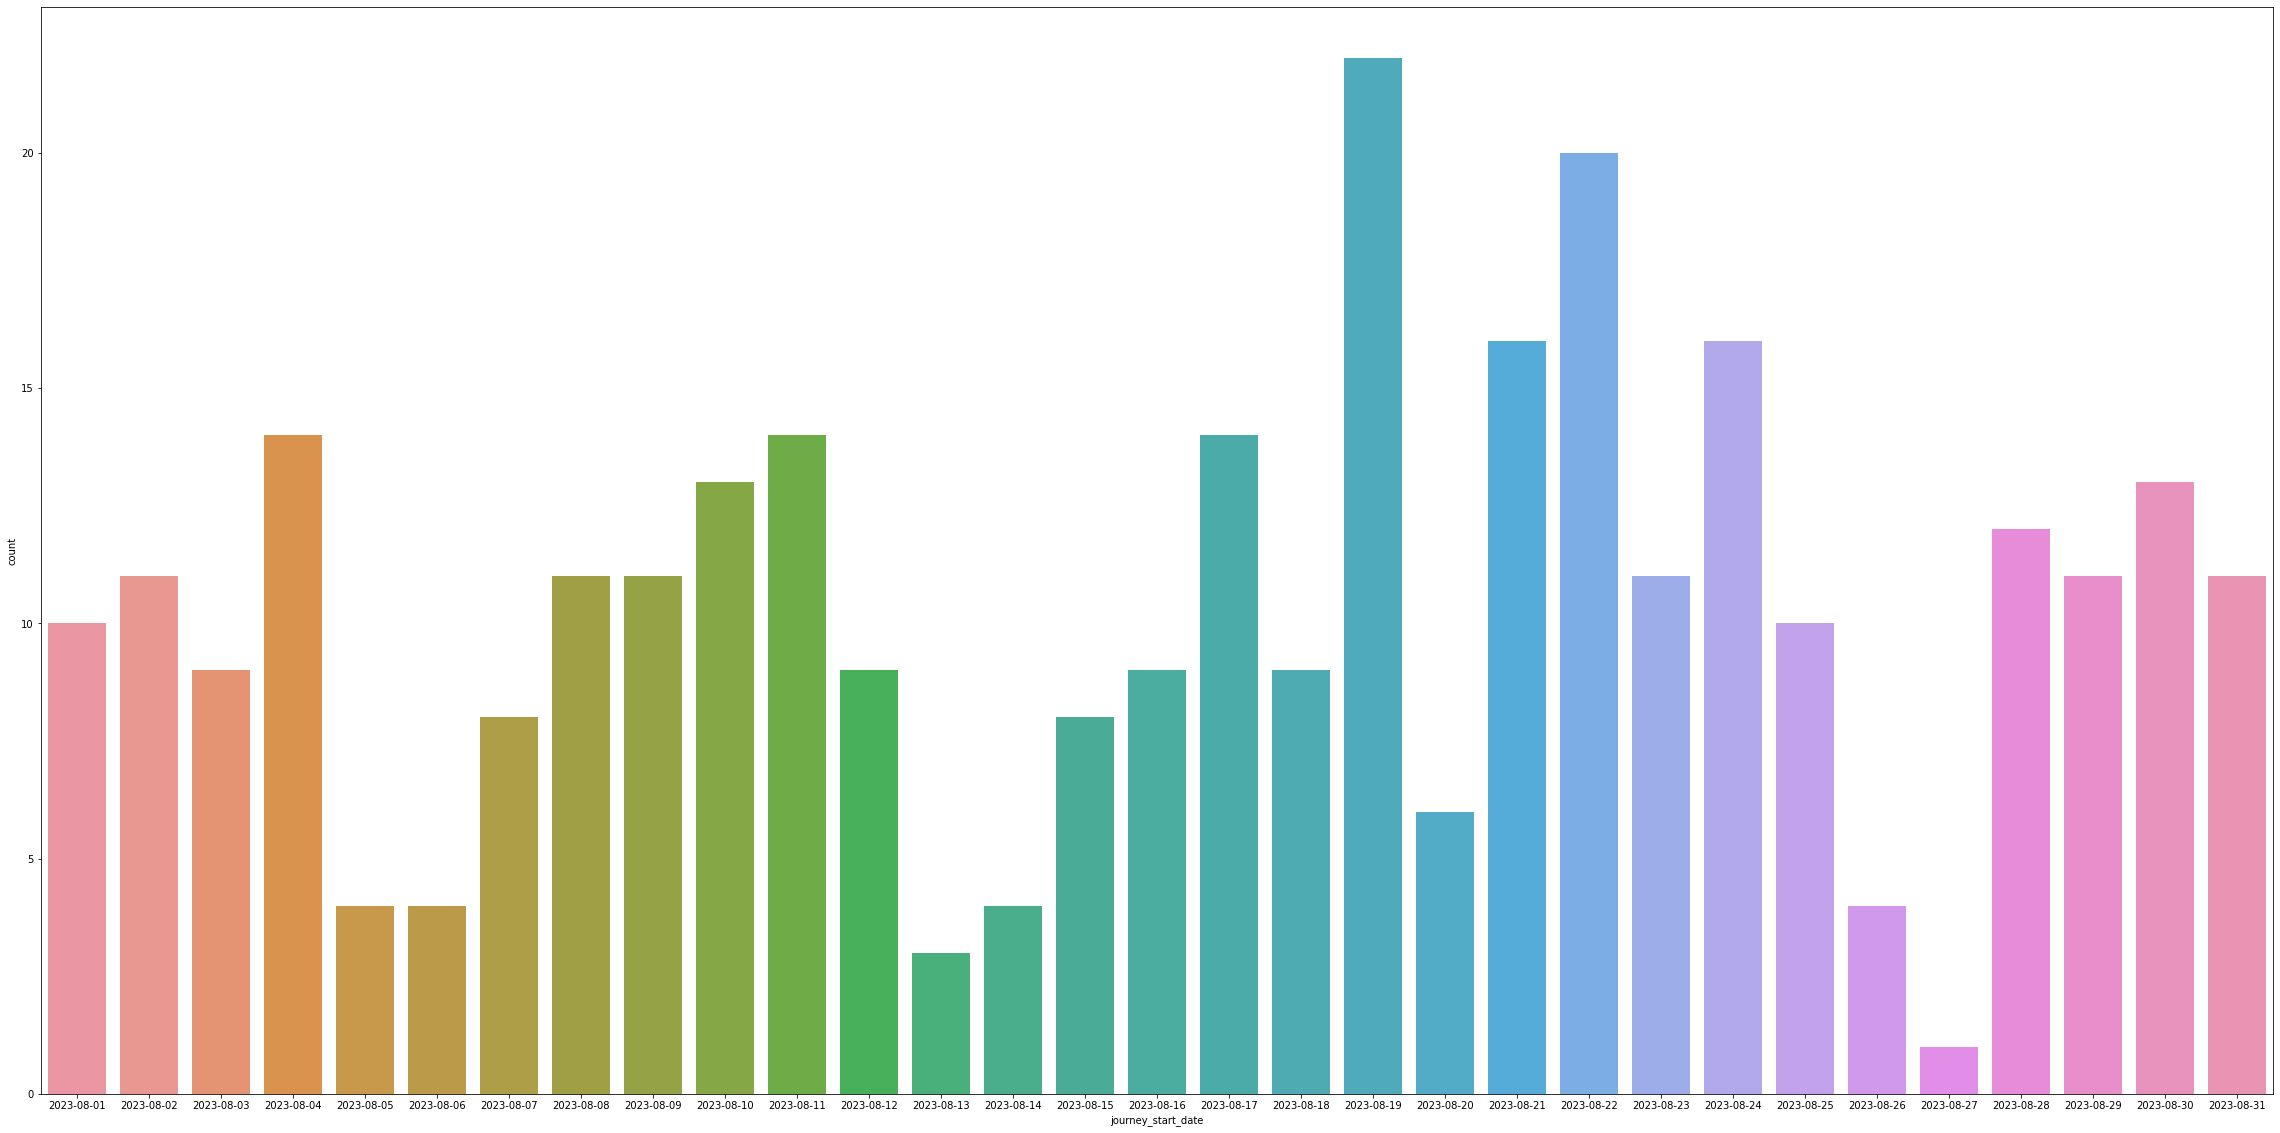

In [58]:
plt.figure(figsize=(40,20))
sns.countplot(data['journey_start_date'])

**On remarque que le 19 aout 2023 le nombre de covoiturage est le plus elevé avec 22 trajets.Par contre, le 27 aout 2023 , un seul trajet est effectué .**

In [59]:
data['journey_start_time'].value_counts()

07:30:00    13
16:40:00    12
08:30:00    12
15:00:00    10
17:10:00    10
            ..
21:40:00     1
23:10:00     1
19:30:00     1
15:30:00     1
14:00:00     1
Name: journey_start_time, Length: 91, dtype: int64

### Diagramme en battons représente l'heure de départ

<AxesSubplot:xlabel='journey_start_time', ylabel='count'>

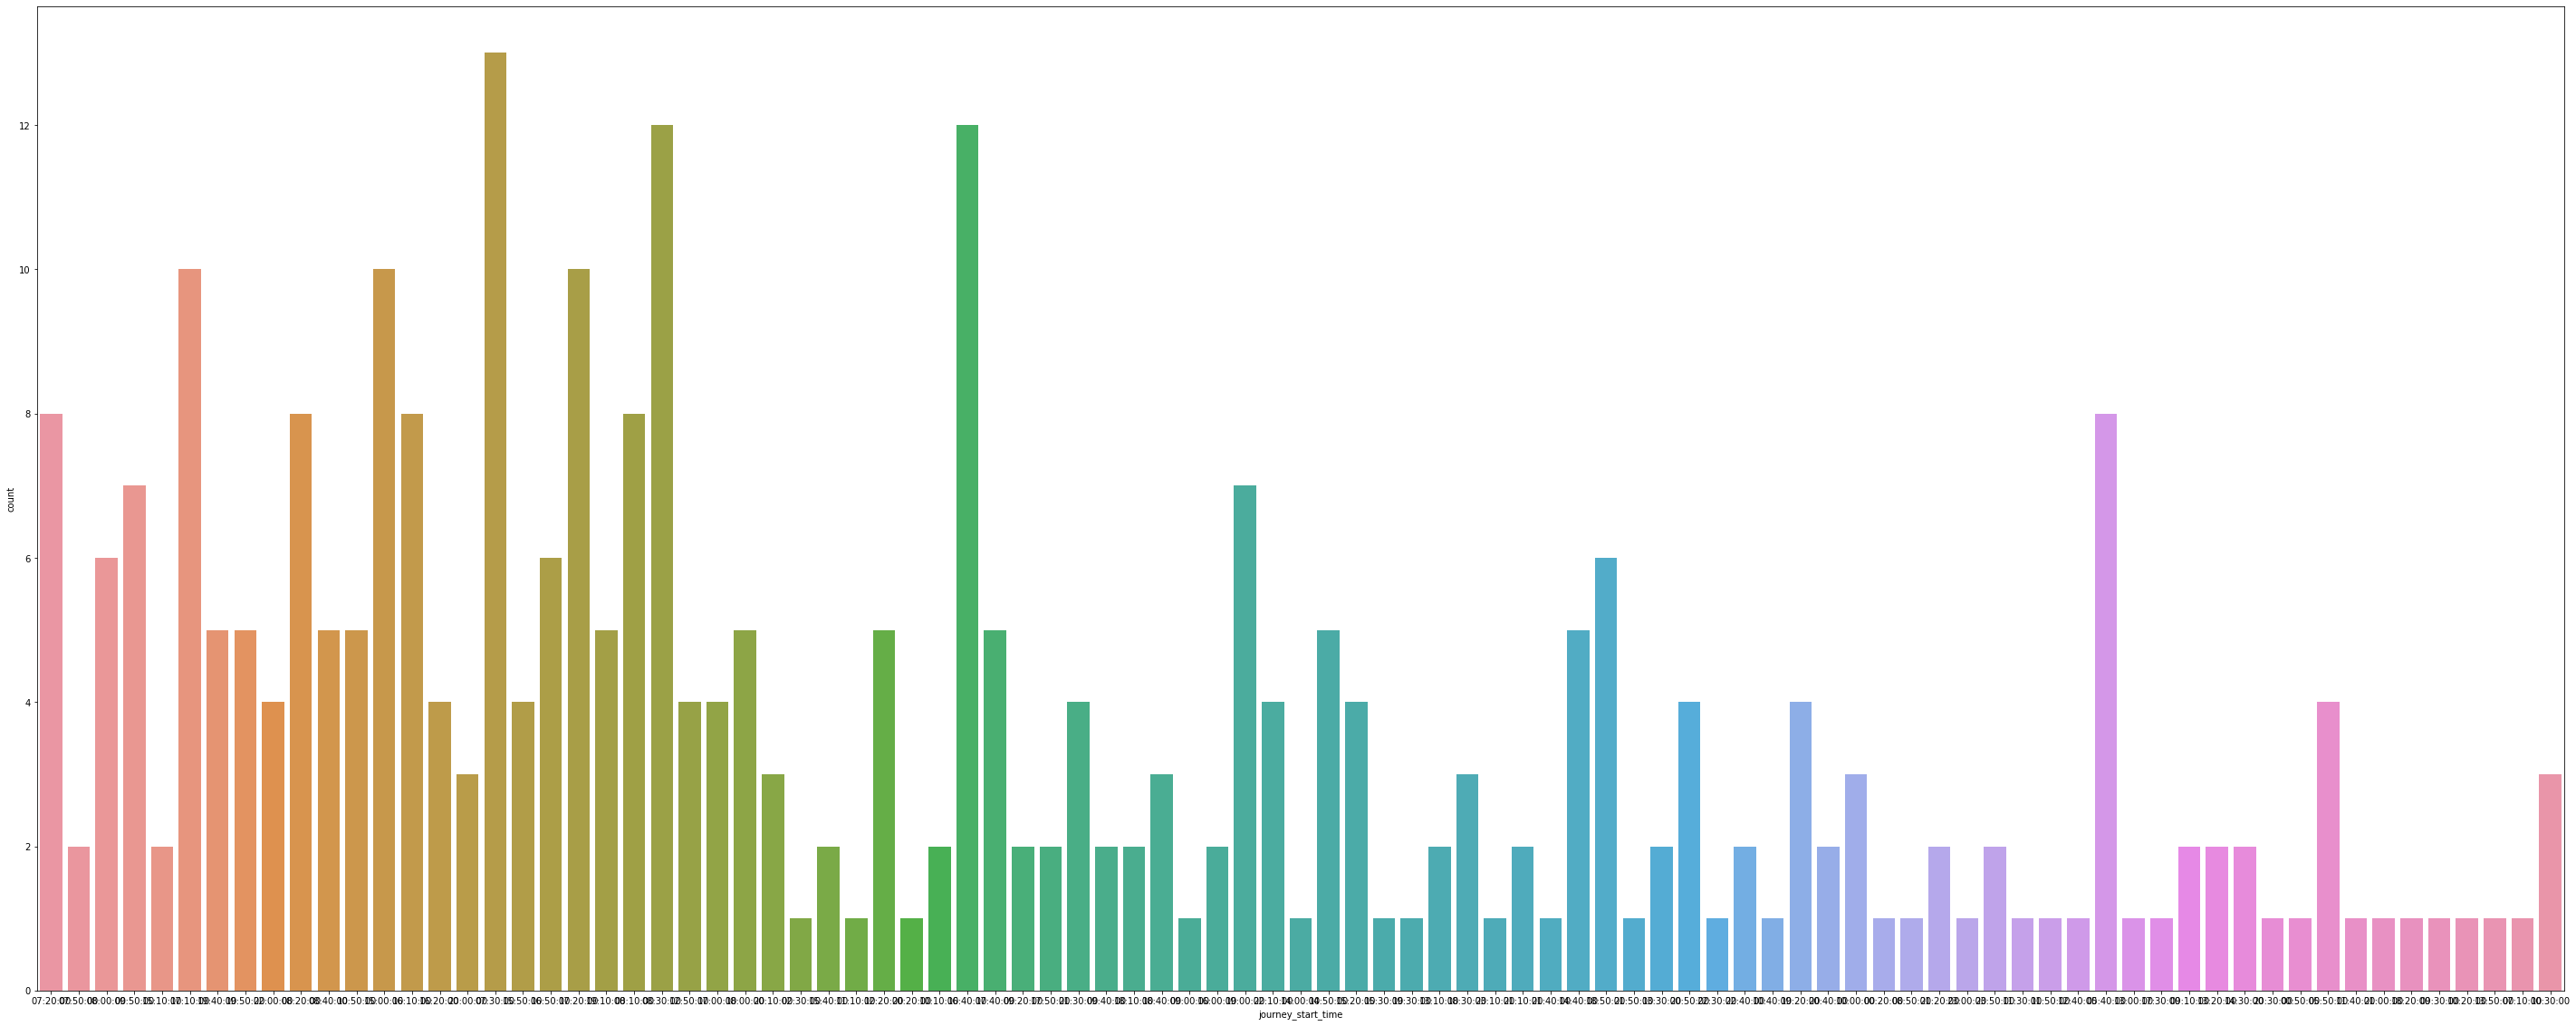

In [60]:
plt.figure(figsize=(50,20))
sns.countplot(data['journey_start_time'])

**On remarque que la plupart des trajets sont effectués pendant les heures matinales.**

In [61]:
data['journey_end_time'].value_counts()

16:50:00    13
08:40:00    12
07:30:00    12
17:30:00     9
17:20:00     9
            ..
19:40:00     1
22:40:00     1
23:20:00     1
13:50:00     1
23:10:00     1
Name: journey_end_time, Length: 90, dtype: int64

### Diagramme en battons représente l'heure d'arrivée

<AxesSubplot:xlabel='journey_end_time', ylabel='count'>

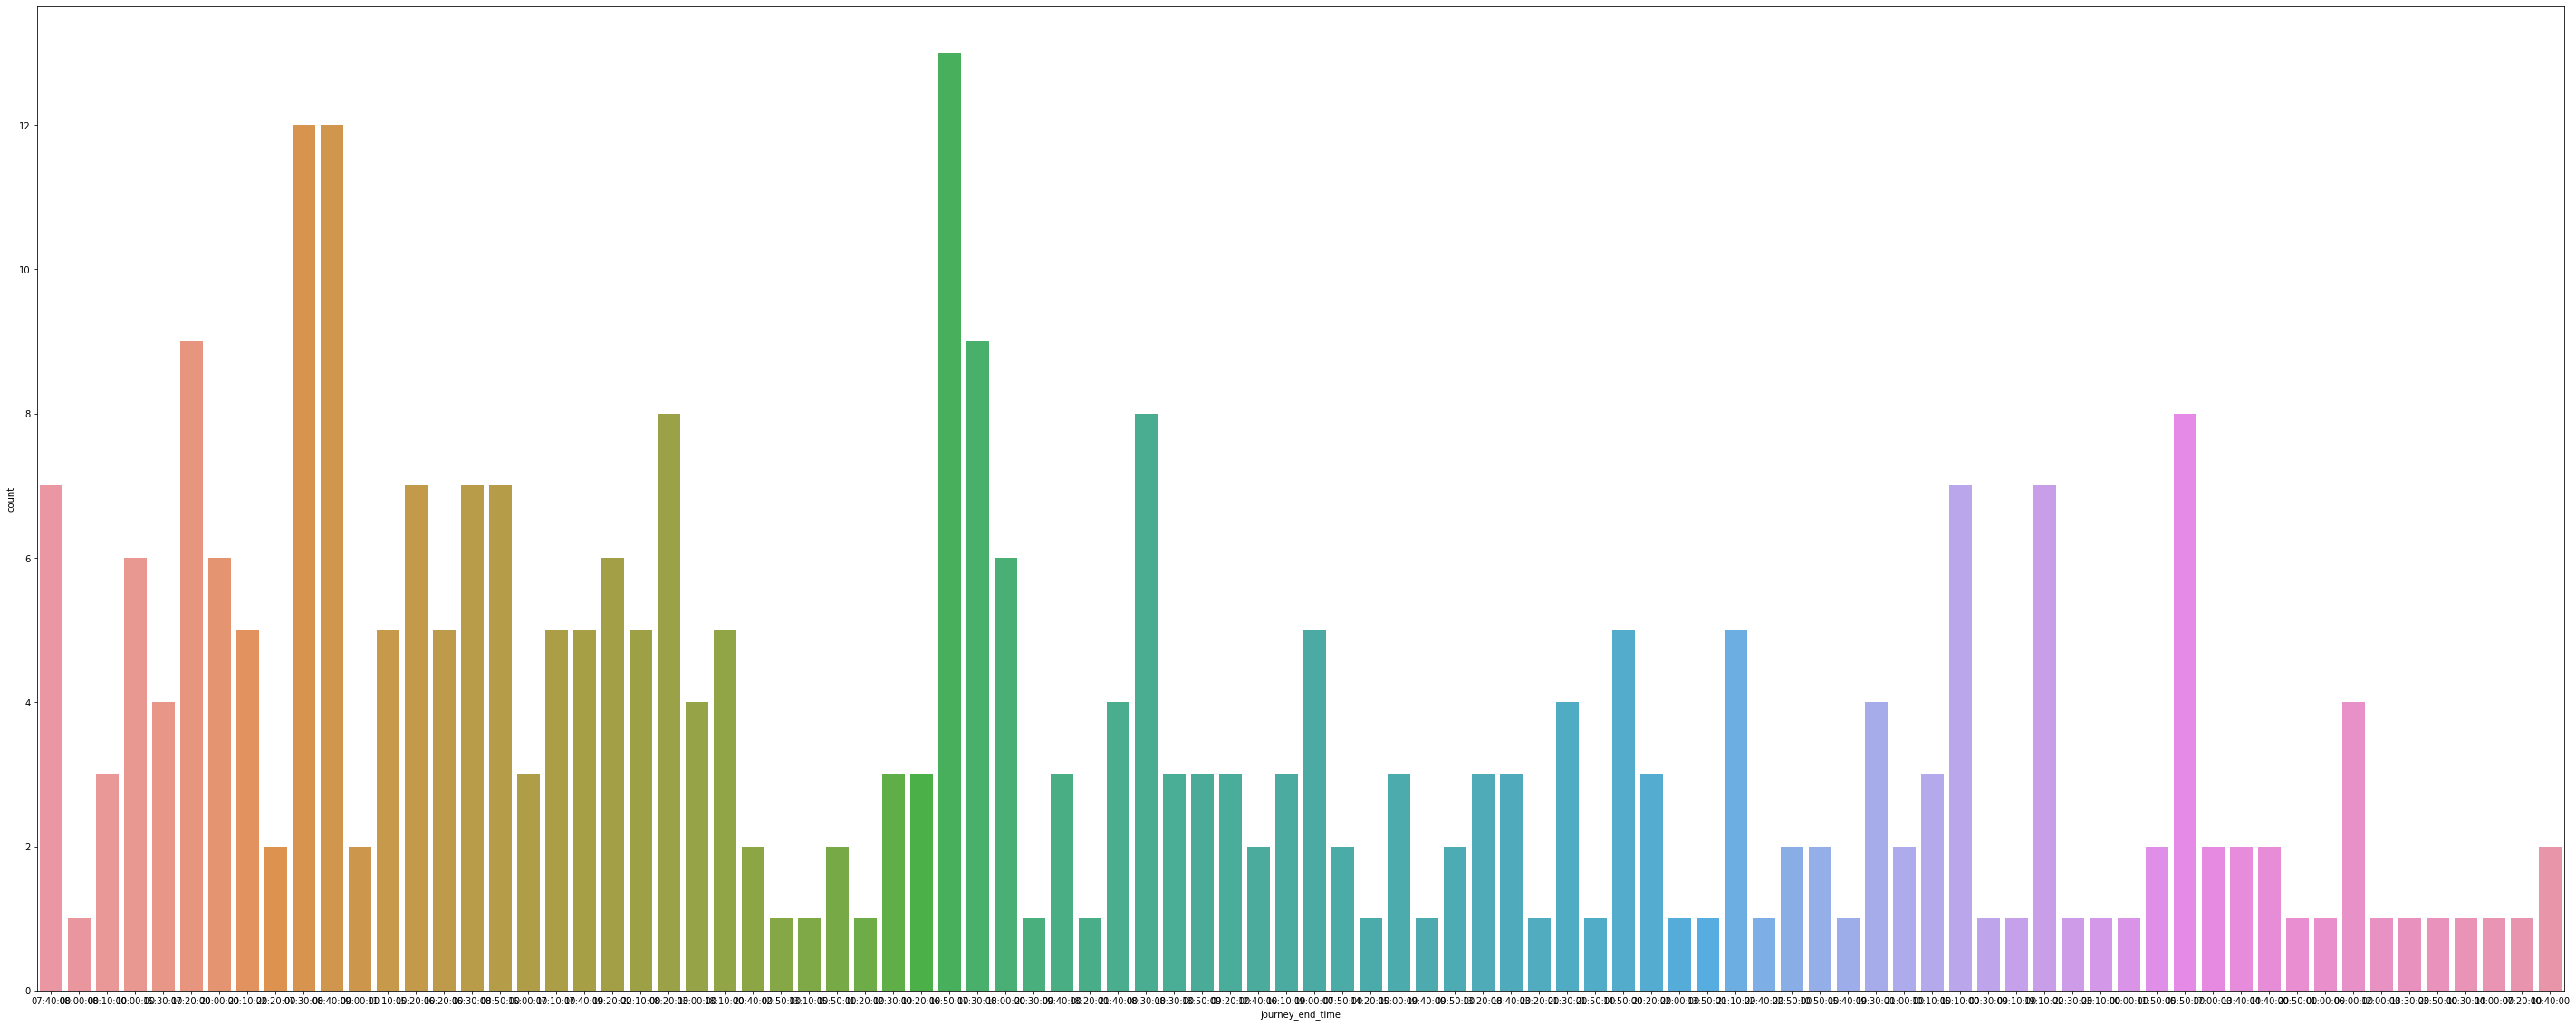

In [62]:
plt.figure(figsize=(50,20))

sns.countplot(data['journey_end_time'])

# Extraction des variables numériques

In [63]:
numerical = data.select_dtypes(exclude=['object']).copy()
l_numerical = list(numerical)
print(l_numerical)

['journey_id', 'journey_start_lon', 'journey_start_lat', 'journey_end_lon', 'journey_end_lat', 'passenger_seats', 'journey_distance', 'journey_duration']


# Histogrammes des variables numériques

In [64]:
data['journey_start_lon'].value_counts()

1.103    25
1.133    22
1.131    19
1.116    14
1.090    14
         ..
1.137     1
1.098     1
1.037     1
1.118     1
1.109     1
Name: journey_start_lon, Length: 68, dtype: int64

### histogramme des coordonées de départ

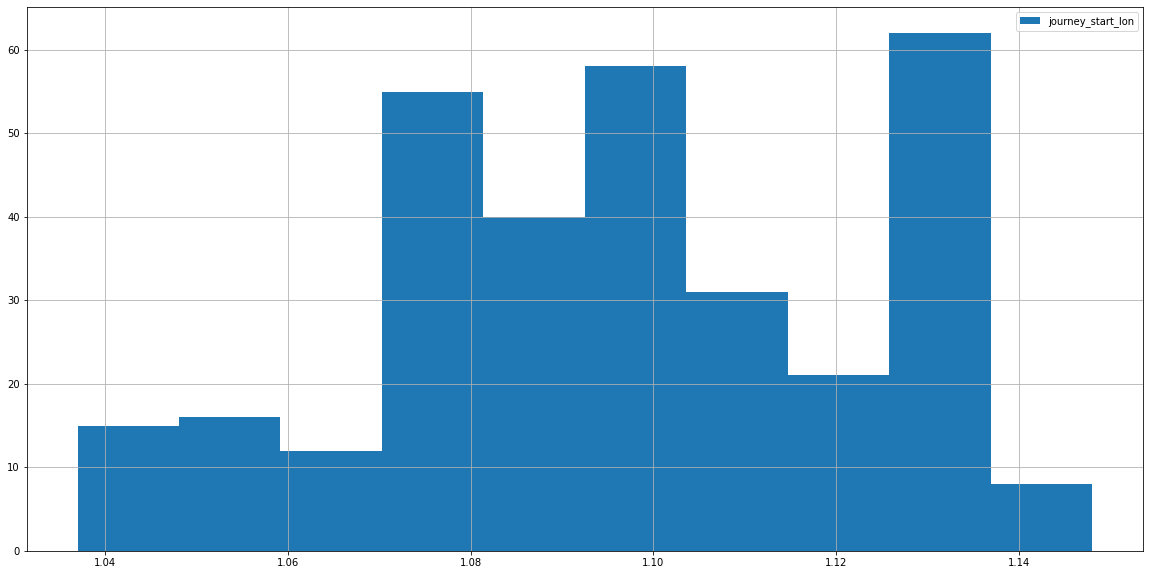

In [65]:
plt.figure(figsize=(20,10))
data['journey_start_lon'].hist(legend=True); 

In [66]:
data['journey_start_lat'].value_counts()

49.449    30
49.431    24
49.437    23
49.446    22
49.442    18
49.455    17
49.456    17
49.440    17
49.430    17
49.447    16
49.445    10
49.426     9
49.439     8
49.444     8
49.419     7
49.433     7
49.443     7
49.452     5
49.421     5
49.432     5
49.458     5
49.450     5
49.438     5
49.428     4
49.434     3
49.448     3
49.429     3
49.457     2
49.425     2
49.436     2
49.441     2
49.427     2
49.453     1
49.423     1
49.461     1
49.424     1
49.454     1
49.435     1
49.420     1
49.422     1
Name: journey_start_lat, dtype: int64

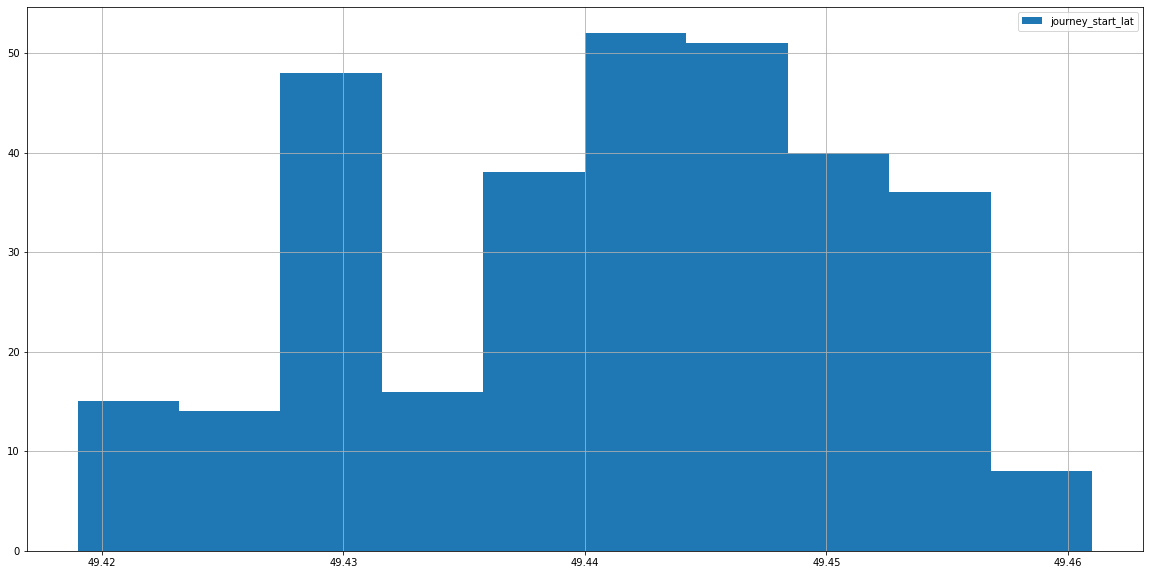

In [67]:
plt.figure(figsize=(20,10))
data['journey_start_lat'].hist(legend=True);

In [68]:
data['journey_end_lat'].value_counts()

49.449    31
49.437    27
49.440    25
49.419    25
49.431    23
49.446    15
49.455    14
49.456    14
49.445    13
49.447    10
49.442     9
49.421     9
49.453     9
49.433     8
49.439     7
49.443     7
49.435     6
49.426     6
49.448     6
49.444     6
49.450     5
49.451     5
49.458     4
49.430     4
49.428     3
49.454     3
49.434     3
49.438     2
49.436     2
49.441     2
49.427     2
49.432     2
49.462     2
49.422     2
49.425     2
49.429     1
49.452     1
49.420     1
49.424     1
49.418     1
Name: journey_end_lat, dtype: int64

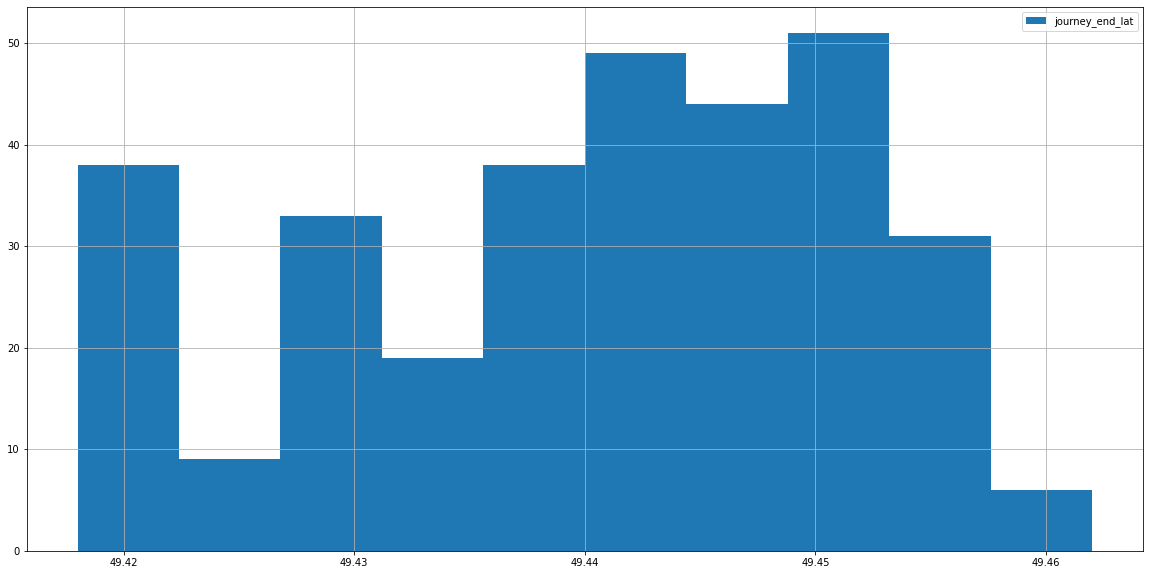

In [69]:
plt.figure(figsize=(20,10))
data['journey_end_lat'].hist(legend=True);

In [70]:
data['journey_end_lat'].value_counts()

49.449    31
49.437    27
49.440    25
49.419    25
49.431    23
49.446    15
49.455    14
49.456    14
49.445    13
49.447    10
49.442     9
49.421     9
49.453     9
49.433     8
49.439     7
49.443     7
49.435     6
49.426     6
49.448     6
49.444     6
49.450     5
49.451     5
49.458     4
49.430     4
49.428     3
49.454     3
49.434     3
49.438     2
49.436     2
49.441     2
49.427     2
49.432     2
49.462     2
49.422     2
49.425     2
49.429     1
49.452     1
49.420     1
49.424     1
49.418     1
Name: journey_end_lat, dtype: int64

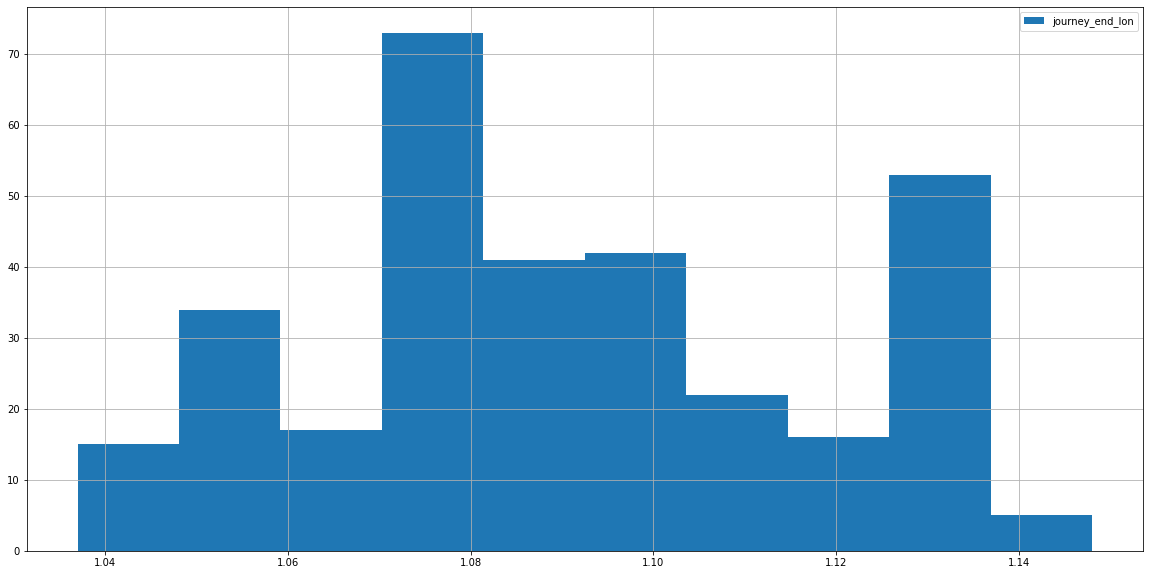

In [71]:
plt.figure(figsize=(20,10))
data['journey_end_lon'].hist(legend=True);

In [72]:
data['journey_distance'].value_counts()

2648    11
8026    11
2811    11
3292    10
3136     9
        ..
2688     1
3272     1
5570     1
3436     1
2430     1
Name: journey_distance, Length: 194, dtype: int64

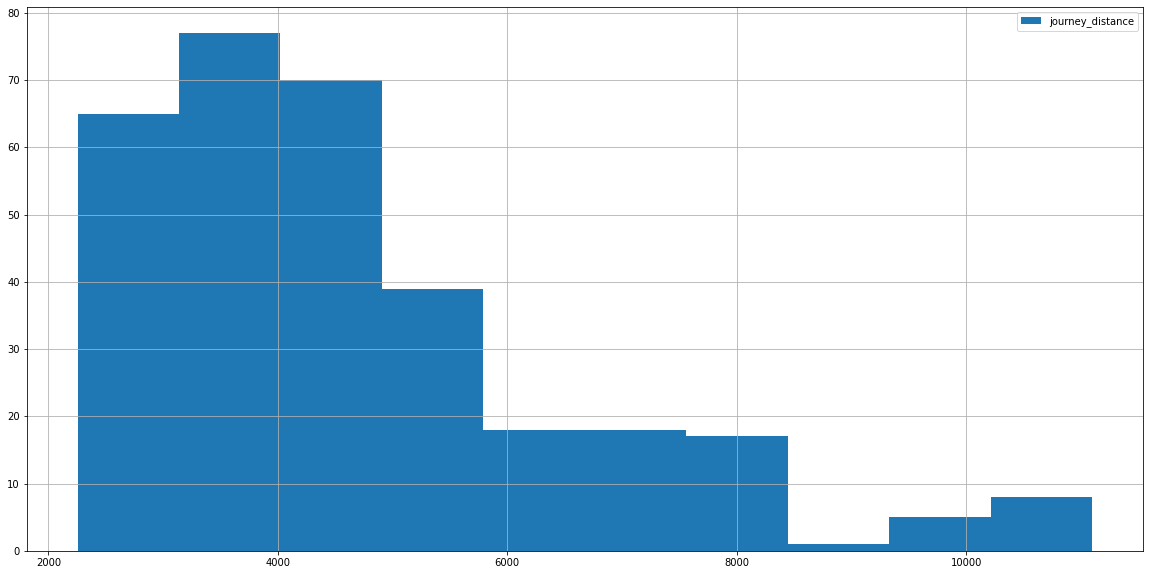

In [73]:
plt.figure(figsize=(20,10))
data['journey_distance'].hist(legend=True);

In [74]:
data['journey_duration'].value_counts()

12    35
8     34
9     34
13    28
15    26
17    25
11    25
10    23
14    23
16    19
18    16
7      8
19     7
20     6
21     3
5      2
6      2
23     1
26     1
Name: journey_duration, dtype: int64

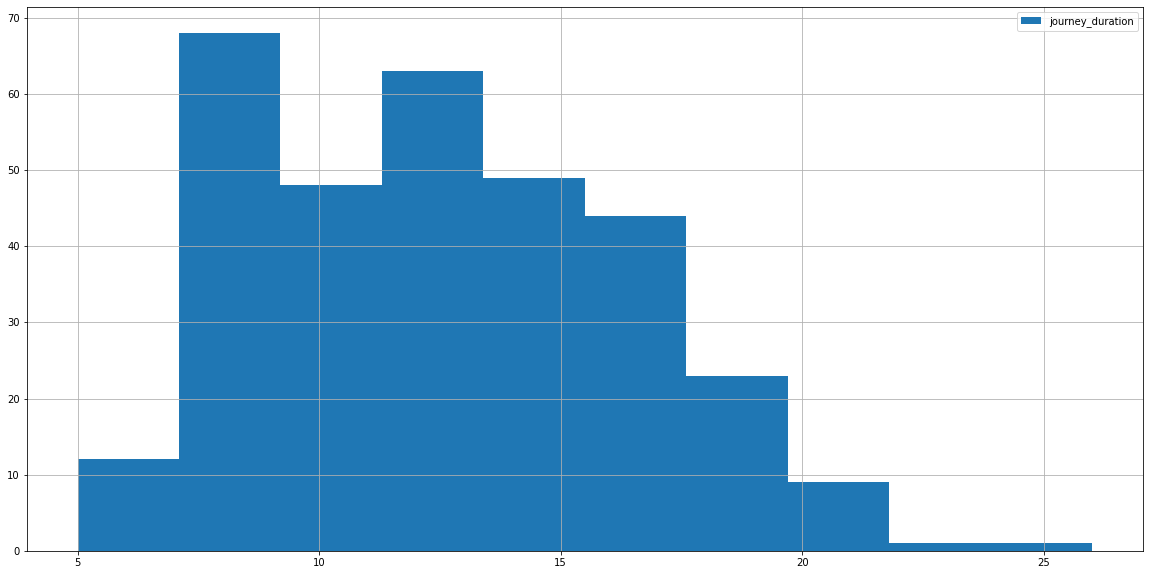

In [75]:
plt.figure(figsize=(20,10))
data['journey_duration'].hist(legend=True);

## Création d'une carte de chaleur en utilisant les coordonées de départ et d'arrivée

In [78]:
import folium
from folium.plugins import HeatMap
# créer une copie de données
newdata=data
#coupler les coordonnées (latitude et longitude) dans un tuple
newdata['Departure'] = newdata.apply(lambda x: (x.journey_start_lat, x.journey_start_lon), axis=1)
newdata['Destination'] = newdata.apply(lambda x: (x.journey_end_lat, x.journey_end_lon), axis=1)
positions=newdata[['Departure','Destination']].to_dict(orient='records')
city_map = folium.Map(location=[49.442120, 1.098870], zoom_start=12) #ici dans cet notre exemple les coordonées du ville de Rouen
#sont [49.442120, 1.098870] vous pouvez adapter le paramètre location suivant votre ville
coordinates = [(offer['Departure'][0], offer['Departure'][1]) for offer in positions]
coordinates += [(offer['Destination'][0], offer['Destination'][1]) for offer in positions]
HeatMap(coordinates).add_to(city_map)
#enregistrer la carte de chaleur sous la forme d'un fichier html
city_map.save('covoiturage_heatmap.html')
print("Heatmap generated successfully.")
city_map

Heatmap generated successfully.


**Carte de chaleur des trajets de covoiturage sur Rouen pendant le mois de Aout**

## Carte de chaleur des covoiturages quotidiennes Sur Rouen durant le mois de Aout

In [44]:
data2=data
data2['journey_start_date'] = data2['journey_start_date'].sort_values(ascending=True)

data1 = []

for _, d in data2.groupby('journey_start_date'):
    data1.append([[row['journey_start_lat'], row['journey_start_lon'],row['journey_end_lon'],row['journey_end_lat']] for _, row in d.iterrows()])
city_animated_map = folium.Map(location=[49.442120, 1.098870], zoom_start=13, tiles='CartoDB positron')
heatmap = plugins.HeatMapWithTime(data1, auto_play=True,
                             display_index=True,
                             gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'},
                             index = data2['journey_start_date'].drop_duplicates().tolist(),
                            )
heatmap.add_to(city_animated_map)

city_animated_map.save("map.html")
city_animated_map


 # Réduction du Taux d'émission du CO$_2$ en utilisant le covoiturage

 D'aprés le site [EPA](https://www.epa.gov/greenvehicles/greenhouse-gas-emissions-typical-passenger-vehicle),chaque véhicule produit en moyenne de 404g de dioxide de carbonne par mile , c'est à peu prés 251.186g/km

1/ La première étape consiste à calculer le taux totale d'emission du dioxide de carbonne pour chaque trajet

In [32]:
temp_data=data # on crée un copie du données originales
temp_data["CO2_grams"] = temp_data.journey_distance * (251.186 /1000) # car la distance dans notre base est en mètre

In [33]:
temp_data.head()

,journey_id,trip_id,journey_start_datetime,journey_start_date,journey_start_time,journey_start_lon,journey_start_lat,journey_start_insee,journey_start_department,journey_start_town,...,journey_end_towngroup,journey_end_country,passenger_seats,operator_class,journey_distance,journey_duration,has_incentive,Departure,Destination,CO2_grams
2868,17280612,50b326ba-3e28-428d-b3bf-0062dce8e131,2023-08-01T07:20:00+02:00,2023-08-01,07:20:00,1.102,49.439,76540,76,Rouen,...,Métropole Rouen Normandie,France,1,C,4738,13,NON,"(49.439, 1.102)","(49.435, 1.051)",1190.119268
4791,17281291,9d924fa1-81d9-40db-9249-044337330c39,2023-08-01T07:50:00+02:00,2023-08-01,07:50:00,1.089,49.430,76540,76,Rouen,...,Métropole Rouen Normandie,France,1,C,3025,11,NON,"(49.43, 1.089)","(49.44, 1.112)",759.837650
6304,17281626,53453318-98bc-474c-811a-46e24576f13c,2023-08-01T08:00:00+02:00,2023-08-01,08:00:00,1.116,49.446,76540,76,Rouen,...,Métropole Rouen Normandie,France,1,C,4465,13,NON,"(49.446, 1.116)","(49.445, 1.072)",1121.545490
9248,17283913,02ded5e1-8a81-4cbc-9915-e57b627a8d9f,2023-08-01T09:50:00+02:00,2023-08-01,09:50:00,1.104,49.431,76540,76,Rouen,...,Métropole Rouen Normandie,France,1,C,5038,16,NON,"(49.431, 1.104)","(49.419, 1.076)",1265.475068
11662,17289382,e915bba4-9ed0-4ab6-8de3-ed0924492397,2023-08-01T15:10:00+02:00,2023-08-01,15:10:00,1.105,49.442,76540,76,Rouen,...,Métropole Rouen Normandie,France,1,C,3919,15,NON,"(49.442, 1.105)","(49.421, 1.081)",984.397934


In [34]:
temp_data.describe()

,journey_id,journey_start_lon,journey_start_lat,journey_end_lon,journey_end_lat,passenger_seats,journey_distance,journey_duration,CO2_grams
count,3.180000e+02,318.000000,318.000000,318.000000,318.000000,318.0,318.000000,318.000000,318.000000
mean,1.753920e+07,1.097516,49.441003,1.091481,49.439997,1.0,4713.194969,12.701258,1183.888591
std,1.380897e+05,0.025345,0.009913,0.026569,0.011051,0.0,1897.501284,3.694407,476.625758
min,1.728061e+07,1.037000,49.419000,1.037000,49.418000,1.0,2254.000000,5.000000,566.173244
25%,1.743265e+07,1.079000,49.432000,1.074000,49.431250,1.0,3292.000000,9.250000,826.904312
50%,1.755134e+07,1.101000,49.442000,1.090000,49.440000,1.0,4362.000000,12.000000,1095.673332
75%,1.763769e+07,1.116000,49.449000,1.112000,49.449000,1.0,5441.250000,15.000000,1366.765823
max,1.781542e+07,1.148000,49.461000,1.148000,49.462000,1.0,11098.000000,26.000000,2787.662228


L'ideé ici est de regrouper les voyages en utlisant la colonne "journey_start_datetime", Pour cela on doit introduire une période  $T$ en minutes.
C'est à dire, les voyages qui commencent à *$H$ $:$ $M$ et $H$ $:$ $M$+ $T$ , on peut les regrouper ensemble ,

In [35]:
import joblib as jb
from tqdm.auto import trange

# ce code permet de faire l'alignement des heures de départ
def align_time(t,T):
    if round(t.minute % T / T) == 1: t += pd.Timedelta(minutes = T)
    t += pd.Timedelta(minutes = -t.minute % T, seconds = -t.second)
    return t

On doit d'abord faire quelques modifications à la colonne "journey_start_datetime" pour le convertir du type chaine de caractères en type DateTime 

In [36]:
from datetime import datetime

def string_to_date(stringdate):
    date_string_t=stringdate[:10]+" "+stringdate[11:19]
    date_format = "%Y-%m-%d %H:%M:%S"
    datetime_obj = datetime.strptime(date_string_t, date_format)
    return datetime_obj
    
    

In [37]:
temp_data['journey_start_datetime']=temp_data['journey_start_datetime'].apply(string_to_date)

In [38]:
def covoiturage(df, T=10):
    
    # création d'une copie du dataset
    df=df.copy()
    
    #faire le regroupement des date et heures de départ
    df.insert(loc=0, column="pool_pickup_datetime", value=jb.Parallel(n_jobs=-1)(jb.delayed(align_time)(df.journey_start_datetime.iloc[i], T=T) for i in trange(df.shape[0], desc="Align timestamps")))


    df_group = df.groupby(["pool_pickup_datetime", "Departure", "Destination"])
    df = df_group.agg(journey_duration=pd.NamedAgg(column="journey_duration", aggfunc=lambda t: t.values.mean()), journey_distance = pd.NamedAgg(column="journey_distance", aggfunc="mean"), passenger_count = pd.NamedAgg(column="passenger_seats", aggfunc="sum"), CO2_grams = pd.NamedAgg(column="CO2_grams", aggfunc="max")).reset_index()
    df.insert(loc=0, column="pool", value=[list(x) for x in df_group.groups.values()])

    return df

In [39]:
df_pool = covoiturage(temp_data)

Align timestamps:   0%|          | 0/318 [00:00<?, ?it/s]

In [40]:
df_pool.describe()

,journey_duration,journey_distance,passenger_count,CO2_grams
count,297.000000,297.000000,297.000000,297.000000
mean,12.668350,4769.156566,1.070707,1197.948321
std,3.653064,1931.132666,0.256768,485.073831
min,5.000000,2254.000000,1.000000,566.173244
25%,10.000000,3292.000000,1.000000,826.904312
50%,12.000000,4390.000000,1.000000,1102.706540
75%,15.000000,5537.000000,1.000000,1390.816882
max,26.000000,11098.000000,2.000000,2787.662228


In [41]:
df_pool

,pool,pool_pickup_datetime,Departure,Destination,journey_duration,journey_distance,passenger_count,CO2_grams
0,[2868],2023-08-01 07:20:00,"(49.439, 1.102)","(49.435, 1.051)",13.0,4738.0,1,1190.119268
1,[4791],2023-08-01 07:50:00,"(49.43, 1.089)","(49.44, 1.112)",11.0,3025.0,1,759.837650
2,[6304],2023-08-01 08:00:00,"(49.446, 1.116)","(49.445, 1.072)",13.0,4465.0,1,1121.545490
3,[9248],2023-08-01 09:50:00,"(49.431, 1.104)","(49.419, 1.076)",16.0,5038.0,1,1265.475068
4,"[11662, 11724]",2023-08-01 15:10:00,"(49.442, 1.105)","(49.421, 1.081)",15.0,3919.0,2,984.397934
...,...,...,...,...,...,...,...,...
292,[495102],2023-08-31 15:00:00,"(49.452, 1.056)","(49.441, 1.091)",12.0,3416.0,1,858.051376
293,"[495287, 495288]",2023-08-31 15:20:00,"(49.449, 1.049)","(49.449, 1.077)",8.0,2618.0,2,657.604948
294,[496945],2023-08-31 16:40:00,"(49.437, 1.059)","(49.44, 1.09)",8.0,2811.0,1,706.083846
295,[499290],2023-08-31 17:20:00,"(49.431, 1.103)","(49.456, 1.133)",11.0,6909.0,1,1735.444074


 ## Calcul du quantité de CO$_2$ totale avant et aprés le partage des véhicules

In [42]:
CO2 = temp_data.CO2_grams.sum()/1e+3
CO2_pool = df_pool.CO2_grams.sum()/1e+3

print("CO2 produit avant: \t{:.0f} KG".format(CO2))
print("CO2 produit aprés le partage des véhicules : \t{:.0f} KG ({:.0%})".format(CO2_pool, (CO2_pool - CO2)/CO2))

CO2 produit avant: 	376 KG
CO2 produit aprés le partage des véhicules : 	356 KG (-5%)


## Conclusion

Le covoiturage est une approche efficace pour diminuer le taux d'émission du dioxyde de carbone, dans notre exemple, la réduction était de 5%, ce pourcentage peut être augmenté en modifiant, le type de véhicules, la capacité etc.